In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import pytesseract as pt
# import easyocr

In [3]:
# settings
INPUT_WIDTH =  640
INPUT_HEIGHT = 640

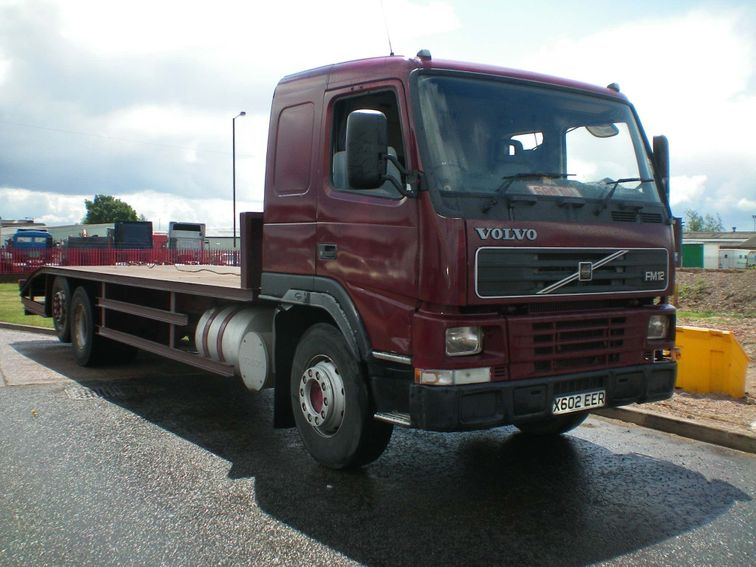

In [6]:
# LOAD THE IMAGE

img = cv2.imread('test/201802083530854.jpg')
# print(img)
from PIL import Image
Image.open('test/201802083530854.jpg')

# cv2.namedWindow('test image',cv2.WINDOW_KEEPRATIO)
# cv2.imshow('test image',img)
# cv2.waitKey()
# cv2.destroyAllWindows()

In [14]:
# LOAD YOLO MODEL
net = cv2.dnn.readNetFromONNX(r'D:\\Coding\DHANUSH\\Team Dhanush\\SIH\\Practice\\ANPR - Course Udemy\\Final Project\\static\\models\\best.onnx')
# net = cv2.dnn.readNetFromONNX('/content/drive/MyDrive/DHANUSH/SIH/YOLO/Shivam_Model/best.onnx')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [20]:
def get_detections(img,net):
    # CONVERT IMAGE TO YOLO FORMAT
    image = img.copy()
    row, col, d = image.shape

    max_rc = max(row,col)
    input_image = np.zeros((max_rc,max_rc,3),dtype=np.uint8)
    input_image[0:row,0:col] = image

    # GET PREDICTION FROM YOLO MODEL
    blob = cv2.dnn.blobFromImage(input_image,1/255,(INPUT_WIDTH,INPUT_HEIGHT),swapRB=True,crop=False)
    net.setInput(blob)
    preds = net.forward()
    print('Preds Shape: ', preds.shape)
    detections = preds[0]
    print('Detection Shape: ', detections.shape)
    
    return input_image, detections

def non_maximum_supression(input_image,detections):
    # FILTER DETECTIONS BASED ON CONFIDENCE AND PROBABILIY SCORE
    # center x, center y, w , h, conf, proba
    boxes = []
    confidences = []

    image_w, image_h = input_image.shape[:2]
    x_factor = image_w/INPUT_WIDTH
    y_factor = image_h/INPUT_HEIGHT

    for i in range(len(detections)):
        row = detections[i]
        confidence = row[4] # confidence of detecting license plate
        print('Confidence: ', confidence)
        # Below 2 lines are changed by Sachin
        if confidence > 0.4:
            class_score = row[5] # probability score of license plate
            if class_score > 0.25:
                cx, cy , w, h = row[0:4]

                left = (cx - 0.5*w)*x_factor
                top = (cy-0.5*h)*y_factor
                width = w*x_factor
                height = h*y_factor
                box = np.array([left,top,width,height])
                confidences.append(confidence)
                boxes.append(box)

    # clean
    boxes_np = np.array(boxes).tolist()
    confidences_np = np.array(confidences).tolist()
    # NMS
    index = cv2.dnn.NMSBoxes(boxes_np,confidences_np,0.25,0.45).flatten()
    
    return boxes_np, confidences_np, index

def drawings(image,boxes_np,confidences_np,index):
    # drawings
    for ind in index:
        x,y,w,h =  boxes_np[ind]
        bb_conf = confidences_np[ind]
        conf_text = 'plate: {:.0f}%'.format(bb_conf*100)
        license_text = extract_text(image,boxes_np[ind])


        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
        cv2.rectangle(image,(x,y-30),(x+w,y),(255,0,255),-1)
        cv2.rectangle(image,(x,y+h),(x+w,y+h+30),(0,0,0),-1)


        cv2.putText(image,conf_text,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),1)
        cv2.putText(image,license_text,(x,y+h+27),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),1)

    return image

def extract_text(image,bbox):
    x,y,w,h = bbox
    roi = image[y:y+h, x:x+w]
    
    if 0 in roi.shape:
        return ''
    else:
        Edited by Sachin Dabhade
        text = pt.image_to_string(roi)
        text = text.strip()
        text = 'success'
        
        return text

SyntaxError: invalid syntax (375078242.py, line 82)

In [21]:
# predictions
def yolo_predictions(img,net):
    ## step-1: detections
    input_image, detections = get_detections(img,net)
    ## step-2: NMS
    boxes_np, confidences_np, index = non_maximum_supression(input_image, detections)
    ## step-3: Drawings
    result_img = drawings(img,boxes_np,confidences_np,index)
    return result_img

In [25]:
# test
img = cv2.imread(r'D:\Coding\DHANUSH\Team Dhanush\SIH\Practice\ANPR - Course Udemy\Final Project\test\201802083530854.jpg')
results = yolo_predictions(img,net)
# Image.fromarray(ori_images[0])

Preds Shape:  (1, 25200, 6)
Detection Shape:  (25200, 6)
Confidence:  6.8711506e-06
Confidence:  3.6569515e-06
Confidence:  4.382358e-06
Confidence:  3.6434103e-06
Confidence:  5.8643404e-06
Confidence:  6.8505205e-06
Confidence:  5.3166295e-06
Confidence:  6.4057986e-06
Confidence:  8.036443e-06
Confidence:  9.556194e-06
Confidence:  1.0066547e-05
Confidence:  1.1205671e-05
Confidence:  1.2413461e-05
Confidence:  1.4227301e-05
Confidence:  1.3995007e-05
Confidence:  1.50213955e-05
Confidence:  1.423216e-05
Confidence:  1.6053189e-05
Confidence:  1.1410728e-05
Confidence:  1.2417107e-05
Confidence:  1.0477625e-05
Confidence:  1.2459146e-05
Confidence:  8.008152e-06
Confidence:  8.938793e-06
Confidence:  1.088172e-05
Confidence:  1.1908772e-05
Confidence:  8.750058e-06
Confidence:  9.21452e-06
Confidence:  1.0751849e-05
Confidence:  1.0403279e-05
Confidence:  9.984951e-06
Confidence:  9.003455e-06
Confidence:  7.552935e-06
Confidence:  6.5401755e-06
Confidence:  9.663694e-06
Confidence:

AttributeError: 'tuple' object has no attribute 'flatten'

### Real Time Object Detection

In [ ]:
cap = cv2.VideoCapture('./test_images/traffic.mp4')


while True:
    ret, frame = cap.read()
    
    if ret == False:
        print('unable to read video')
        break
        
    results = yolo_predictions(frame,net)
    
#     cv2.namedWindow('YOLO',cv2.WINDOW_KEEPRATIO)
#     cv2.imshow('YOLO',results)
#     if cv2.waitKey(1) == 27:
#         break
        
# cv2.destroyAllWindows()
cap.release()

KeyboardInterrupt: 